#### Titanic 승객의 생존여부 예측하기
1. Data Load
2. Data Preprocessing(전처리)
3. Visualization (시각화)
4. Feature Engineering (독립변수 Selection)
5. GridSearchCV를 사용해서 Training Dataset Model의 best parameter 찿기
6. Best Parameter를 적용한 Model 생성해서, 학습(fit) , 예측(predict) 하기
7. Submission(제출)

### 1. Data Load

In [74]:
import pandas as pd

train = pd.read_csv('data/titanic/train.csv', index_col='PassengerId')
print(train.shape)
print(train.info())
train.head()

(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
test = pd.read_csv('data/titanic/test.csv', index_col='PassengerId')
print(test.shape)
print(test.info())
test.head()

(418, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [76]:
# 훈련데이터 null data 건수 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [77]:
# 테스트데이터 null data 건수 확인
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [78]:
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


### 2. Data Preprocessing
* Sex(성별) : 문자로 숫자로 변경 male은 0으로, female 1
* Embarked(선착장) : C, S, Q  One Hot Encoding 범주형 데이터 처리
* Age,Fare : null data 처리


In [79]:
print(train['Sex'].unique())
train['Sex'].value_counts()

['male' 'female']


male      577
female    314
Name: Sex, dtype: int64

In [80]:
# 훈련데이터와 테스트데이터를 전처리를 한번에 하기 위해서 
train_test_data = [train,test]


In [81]:
#Sex(성별) : 문자로 숫자로 변경 male은 0으로, female 1
for data in train_test_data:
    data.loc[data['Sex'] == 'male','Sex'] = 0
    data.loc[data['Sex'] == 'female','Sex'] = 1
    
print(train['Sex'].value_counts())    
print(test['Sex'].value_counts())    

0    577
1    314
Name: Sex, dtype: int64
0    266
1    152
Name: Sex, dtype: int64


In [82]:
# C = Cherbourg, Q = Queenstown, S = Southampton
for data in train_test_data:
    print(data['Embarked'].unique())
    print(data['Embarked'].value_counts())

['S' 'C' 'Q' nan]
S    644
C    168
Q     77
Name: Embarked, dtype: int64
['Q' 'S' 'C']
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [83]:
print(train['Embarked'].isnull().sum())
print(test['Embarked'].isnull().sum())

2
0


#### One Hot Encoding
* 범주형 데이터 인코딩 
* C, S, Q => 0, 1, 2
* 범주형 데이터 갯수만큼의 컬럼을 새로 생성 Embarked_C, Embarked_S, Embarked_Q
* C [True,False,False], S [False, True, False] , Q[False, False, True]

In [84]:
for data in train_test_data:
    data['Embarked_C'] = data['Embarked'] == 'C'
    data['Embarked_S'] = data['Embarked'] == 'S'
    data['Embarked_Q'] = data['Embarked'] == 'Q'

In [85]:
for data in train_test_data:
    print(data[['Embarked','Embarked_C','Embarked_S','Embarked_Q']])

            Embarked  Embarked_C  Embarked_S  Embarked_Q
PassengerId                                             
1                  S       False        True       False
2                  C        True       False       False
3                  S       False        True       False
4                  S       False        True       False
5                  S       False        True       False
...              ...         ...         ...         ...
887                S       False        True       False
888                S       False        True       False
889                S       False        True       False
890                C        True       False       False
891                Q       False       False        True

[891 rows x 4 columns]
            Embarked  Embarked_C  Embarked_S  Embarked_Q
PassengerId                                             
892                Q       False       False        True
893                S       False        True       False
894    

In [86]:
train.loc[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,False,False,False
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,False,False,False


In [87]:
train.loc[train['Embarked'].isnull(),'Embarked_S'] = True

In [88]:
test.loc[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,False,True,False


In [89]:
# pclass 3등급의 Fare(요금)의 평균값
pclass3_fare_mean_value = test.loc[test['Pclass'] == 3,'Fare'].mean()
pclass3_fare_mean_value

12.459677880184334

In [90]:
# Fare가 null값을 pclass 3등급의 Fare(요금)의 평균값으로 
test.loc[test['Fare'].isnull(),'Fare'] = pclass3_fare_mean_value

In [91]:
test.loc[test['Fare'] == 12.459677880184334]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,12.459678,NaN,S,False,True,False


In [92]:
print('Before')
print(train['Age'].mean())
print(test['Age'].mean())

Before
29.69911764705882
30.272590361445783


In [93]:
for data in train_test_data:
    age_mean_value = data['Age'].mean()
    print(age_mean_value)
    data.loc[data['Age'].isnull(),'Age'] = age_mean_value

29.69911764705882
30.272590361445783


In [94]:
print('After')
print(train['Age'].mean())
print(test['Age'].mean())

After
29.699117647058763
30.272590361445815


In [95]:
print(train.isnull().sum())
print(test.isnull().sum())

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Embarked_C      0
Embarked_S      0
Embarked_Q      0
dtype: int64
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         327
Embarked        0
Embarked_C      0
Embarked_S      0
Embarked_Q      0
dtype: int64


In [96]:
print(train['Pclass'].unique())
train['Pclass'].value_counts()

[3 1 2]


3    491
1    216
2    184
Name: Pclass, dtype: int64

### 3. Visualization
* CountPlot : X축, Y축 중 하나만 설정할 수 있는 막대그래프
* BarPlot : X축, Y축 둘 다 설정할 수 있는 막대그래프
* PointPlot : X축과 y축의 관계를 볼 수 있는 선그랲
* DistPlot : 데이터 분포를 볼 수 있는 히스토그램
* Lmplot : 산점도(scatter plot) + 회귀선 

In [97]:
%matplotlib inline

import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='count'>

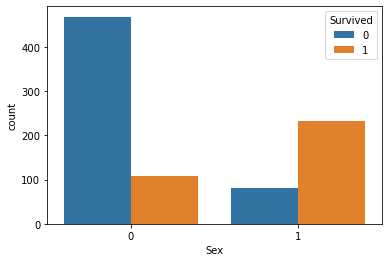

In [98]:
# 성별과 생존여부와의 관련성
sns.countplot(data=train, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

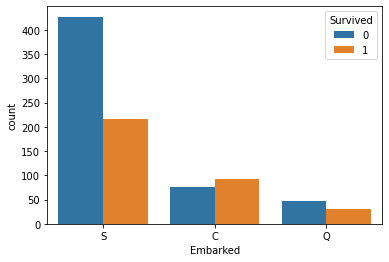

In [99]:
# 선착장(국적)과 생존여부와의 관련성
sns.countplot(data=train, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

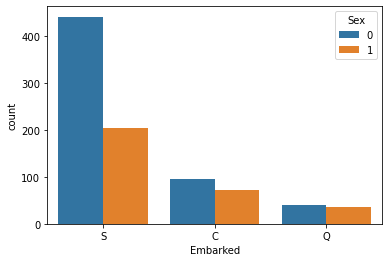

In [100]:
# 선착장(국적)과 성별와의 관련성
sns.countplot(data=train, x='Embarked', hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

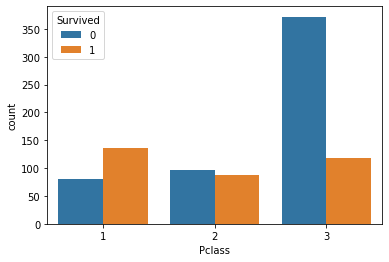

In [101]:
#등급 과 생존여부와의 관련성
sns.countplot(data=train, x='Pclass', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

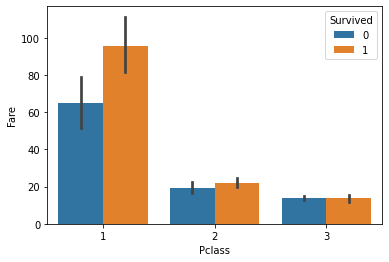

In [105]:
#등급과 요금과의 관계
sns.barplot(data=train, x='Pclass', y='Fare',hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

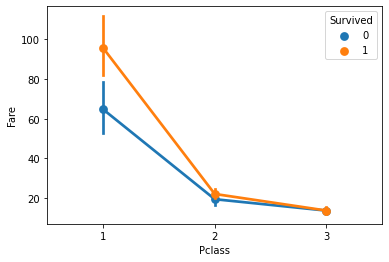

In [104]:
#등급과 요금과의 관계
sns.pointplot(data=train, x='Pclass', y='Fare', hue='Survived')

C:\Users\vega2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

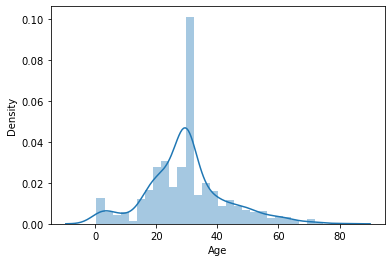

In [109]:
# Age 분포도
sns.distplot(train['Age'], hist=True)

In [110]:
#Age가 1보다 작은 승객은?
train.loc[train['Age'] <= 1,'Age'].count()

14

In [111]:
train.loc[train['Age'] <= 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,
79,1,2,"Caldwell, Master. Alden Gates",0,0.83,0,2,248738,29.0000,NaN,S,False,True,False
165,0,3,"Panula, Master. Eino Viljami",0,1.00,4,1,3101295,39.6875,NaN,S,False,True,False
173,1,3,"Johnson, Miss. Eleanor Ileen",1,1.00,1,1,347742,11.1333,NaN,S,False,True,False
184,1,2,"Becker, Master. Richard F",0,1.00,2,1,230136,39.0000,F4,S,False,True,False
306,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,S,False,True,False
382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.00,0,2,2653,15.7417,NaN,C,True,False,False
387,0,3,"Goodwin, Master. Sidney Leonard",0,1.00,5,2,CA 2144,46.9000,NaN,S,False,True,False
470,1,3,"Baclini, Miss. Helene Barbara",1,0.75,2,1,2666,19.2583,NaN,C,True,False,False
645,1,3,"Baclini, Miss. Eugenie",1,0.75,2,1,2666,19.2583,NaN,C,True,False,False


### 4. Feature Engineering
* 훈련데이터 생성
 - 훈련데이터 독립변수 (X_train)
 - 훈련데이터 종속변수 (y_train)
* 테스트데이터 생성
 - 테스트데이터 독립변수(X_test)

### 5. GridSearchCV를 사용한 하이퍼파라미터 튜닝
* 학습세트 분할
 - 학습세트, 검증세트로 나누기  train_test_split() 
 - sub_input, sub_target
 - val_input, val_target
* 하이퍼파라미터 찾기 - GridSearchCV
* accuracy_score() 함수를 사용해서 점수 확인

### 6. Model 생성 / 학습 / 예측
* DecisionTreeClassfier 알고리즘 사용
 - max_depth = 5
 * 학습 fit()
 * 예측 predict()

### 7. 제출하기